## Poin-poin Assignment
0. Import Dataset Telco Churn
1. Jawablah poin-poin assignment yang tertera

## Data Dictionary (Metadata)
1. CustomerID: A unique ID that identifies each customer.
2. Gender: The customer’s gender: Male, Female

3. Senior Citizen: Indicates if the customer is 65 or older: Yes, No

4. Partner: Indicate if the customer has a partner: Yes, No

5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

6. Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

7. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

8. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

9. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

10. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

11. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

12. Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

13. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

14. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

15. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

16. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

17. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

18. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

19. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

20. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

21. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

21. Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

In [1]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

#import for metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [6]:
# load dataset ke raw_data
raw_data = pd.read_csv('1699606352893-TelcoCustomerChurn (1).csv')
raw_data['Churn'].replace(['Yes','No'],[1,0],inplace=True)
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#gunakan code ini sebelum EDA
raw_data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
raw_data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
raw_data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
raw_data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)

In [9]:
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors = 'coerce')
#mengubah tipe data pada kolom TotalCharges

In [10]:
raw_data = raw_data.drop(["customerID"], axis = 1)

In [ ]:
#tambahkan cell jika diperlukan

## Assignment Exploratory Data Analysis
* Jawablah pertanyaan dibawah ini :

### 1. Assignment : Kolom Kategorikal
* 0. Gunakan kolom kategorikal berikut : Churn, Gender, Online Backup, Device Protection, Streaming TV, Streaming Movies, Contract, Tech Support, Paperless Billing, Payment Method, Phone Service, Internet Service.
* 1. Hitung persentase churn rate tiap jenis kategori di tiap kolom kategorikal diatas terhadap kolom Churn.
* 2. Lakukan bar plot untuk melihat porsi persentase tiap kategorikal
* 3. Lakukan interpretasi insight churn rate di tiap kolom kategorikal diatas.

### 2. Assignment : Kolom Numerikal
* 0. Gunakan kolom numerik berikut : Monthly Charges, Tenure
* 1. Lakukan Box plot untuk melihat distribusi tiap kolom numerik diatas
* 2. Lakukan interpretasi insight dari hasil box plot untuk kolom numerikal diatas.

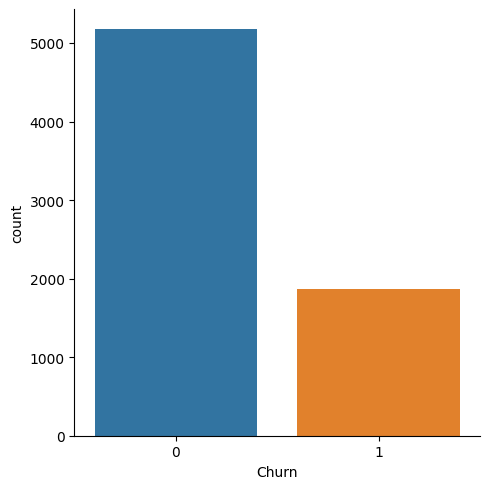

In [11]:
sns.catplot(x = "Churn", kind = "count", data = raw_data);

In [12]:
raw_data['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

### Categorical Data

In [13]:
columns_categorical = ['gender', 'OnlineBackup', 'DeviceProtection',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'TechSupport', 'PaperlessBilling', 'PaymentMethod',
                       'PhoneService', 'InternetService']

In [14]:
for col in columns_categorical:
  temp_raw = raw_data.groupby([col, 'Churn'], as_index = False).size()
  print(temp_raw)

   gender  Churn  size
0  Female      0  2549
1  Female      1   939
2    Male      0  2625
3    Male      1   930
   OnlineBackup  Churn  size
0             0      0  3268
1             0      1  1346
2             1      0  1906
3             1      1   523
   DeviceProtection  Churn  size
0                 0      0  3297
1                 0      1  1324
2                 1      0  1877
3                 1      1   545
   StreamingTV  Churn  size
0            0      0  3281
1            0      1  1055
2            1      0  1893
3            1      1   814
   StreamingMovies  Churn  size
0                0      0  3260
1                0      1  1051
2                1      0  1914
3                1      1   818
         Contract  Churn  size
0  Month-to-month      0  2220
1  Month-to-month      1  1655
2        One year      0  1307
3        One year      1   166
4        Two year      0  1647
5        Two year      1    48
   TechSupport  Churn  size
0            0      0  3440
1 

In [15]:
def proportional_aggregation(df, y, x):
    temp_df = df.groupby([y,x], as_index = False).size()
    temp_df['proportional'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
    return temp_df

In [16]:
for col in columns_categorical:
  proportional = proportional_aggregation(raw_data, col, "Churn")
  print(proportional)

   gender  Churn  size  proportional
0  Female      0  2549      0.730791
1  Female      1   939      0.269209
2    Male      0  2625      0.738397
3    Male      1   930      0.261603
   OnlineBackup  Churn  size  proportional
0             0      0  3268      0.708279
1             0      1  1346      0.291721
2             1      0  1906      0.784685
3             1      1   523      0.215315
   DeviceProtection  Churn  size  proportional
0                 0      0  3297      0.713482
1                 0      1  1324      0.286518
2                 1      0  1877      0.774979
3                 1      1   545      0.225021
   StreamingTV  Churn  size  proportional
0            0      0  3281      0.756688
1            0      1  1055      0.243312
2            1      0  1893      0.699298
3            1      1   814      0.300702
   StreamingMovies  Churn  size  proportional
0                0      0  3260      0.756205
1                0      1  1051      0.243795
2                

In [17]:
def calculate_churn_rate(df, columns):
    for column in columns:
        temp_df = df.groupby(['Churn', column]).size().reset_index(name='counts')
        temp_df['percentage'] = temp_df.groupby('Churn')['counts'].apply(lambda x: x / x.sum() * 100)
        print(f"Churn Rate Percentage for {column}:\n")
        print(temp_df)
        print("\n---\n")


In [18]:
calculate_churn_rate(raw_data, columns_categorical)

Churn Rate Percentage for gender:

   Churn  gender  counts  percentage
0      0  Female    2549   49.265559
1      0    Male    2625   50.734441
2      1  Female     939   50.240770
3      1    Male     930   49.759230

---

Churn Rate Percentage for OnlineBackup:

   Churn  OnlineBackup  counts  percentage
0      0             0    3268   63.161964
1      0             1    1906   36.838036
2      1             0    1346   72.017121
3      1             1     523   27.982879

---

Churn Rate Percentage for DeviceProtection:

   Churn  DeviceProtection  counts  percentage
0      0                 0    3297   63.722458
1      0                 1    1877   36.277542
2      1                 0    1324   70.840021
3      1                 1     545   29.159979

---

Churn Rate Percentage for StreamingTV:

   Churn  StreamingTV  counts  percentage
0      0            0    3281   63.413220
1      0            1    1893   36.586780
2      1            0    1055   56.447298
3      1          

<ipython-input-17-01f512ae794e>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  temp_df['percentage'] = temp_df.groupby('Churn')['counts'].apply(lambda x: x / x.sum() * 100)
<ipython-input-17-01f512ae794e>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  temp_df['percentage'] = temp_df.groupby(

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/

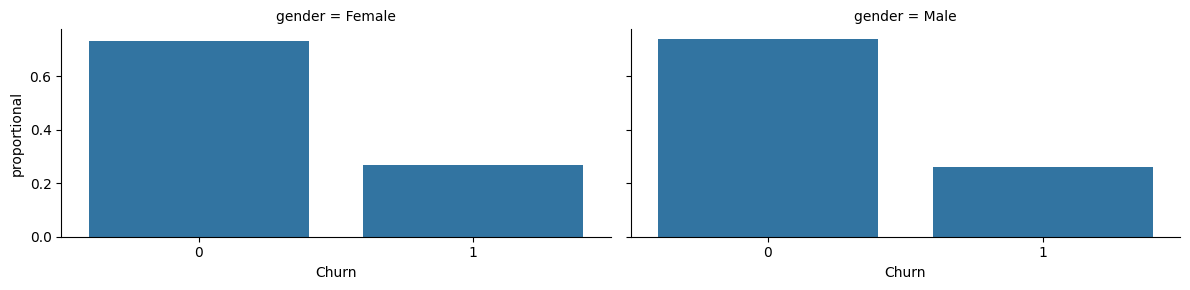

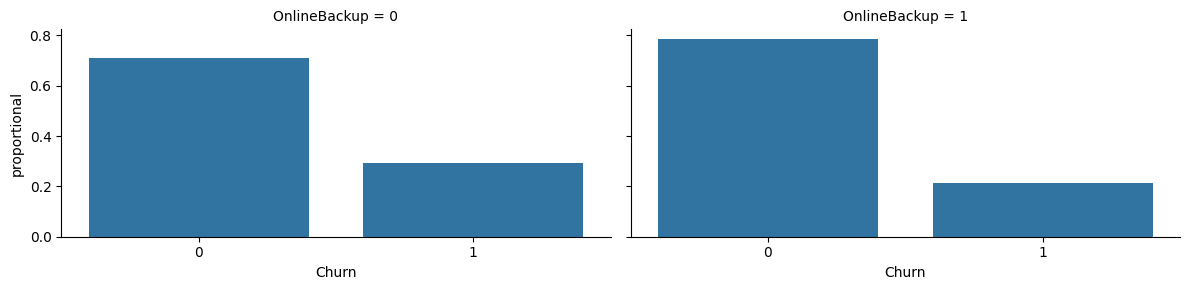

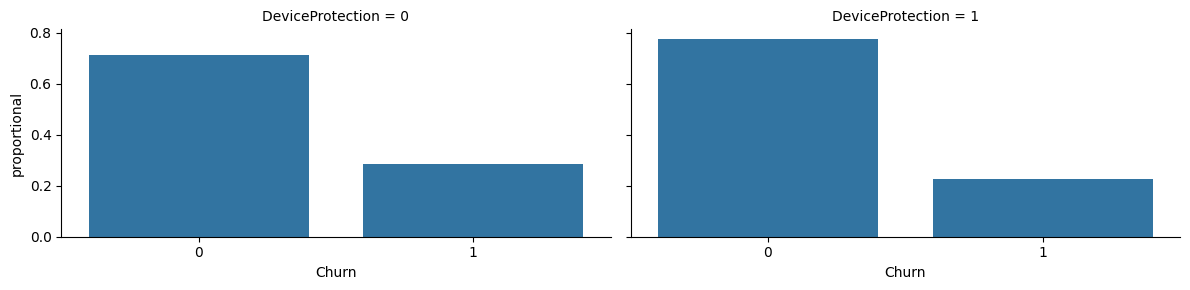

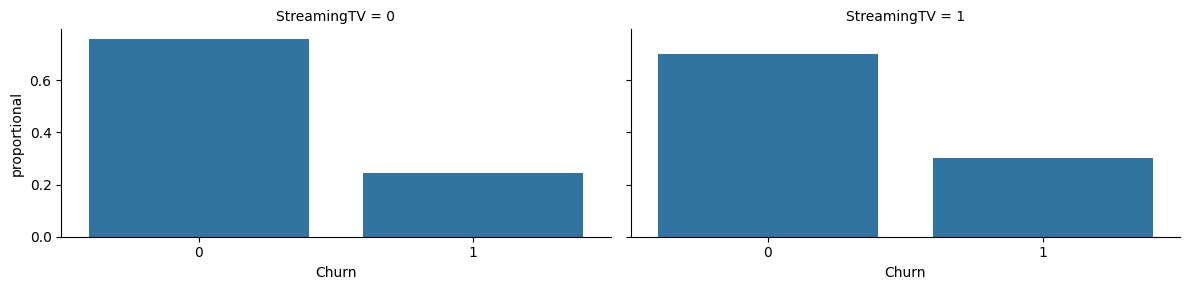

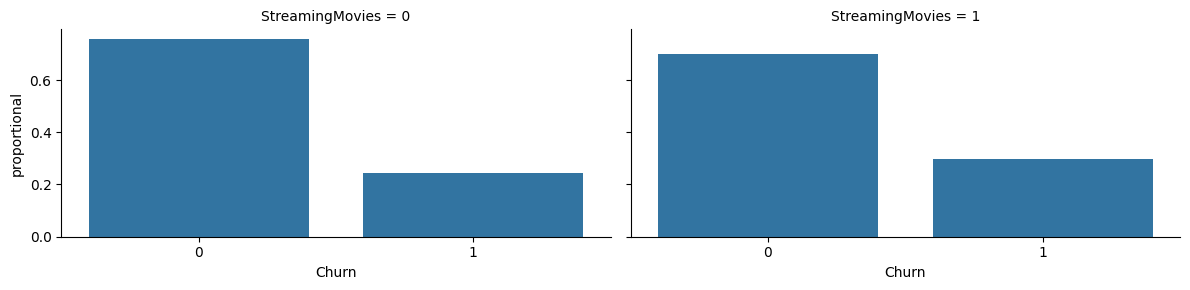

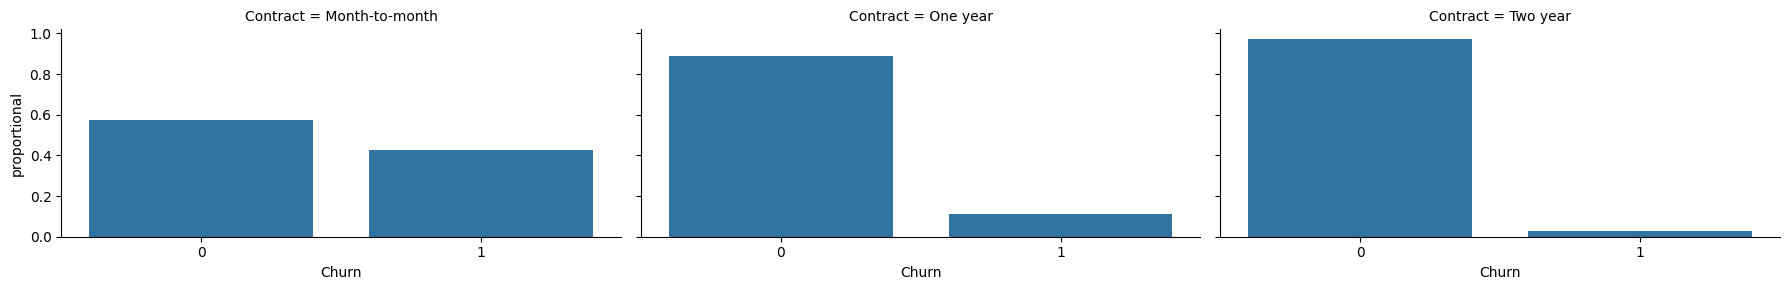

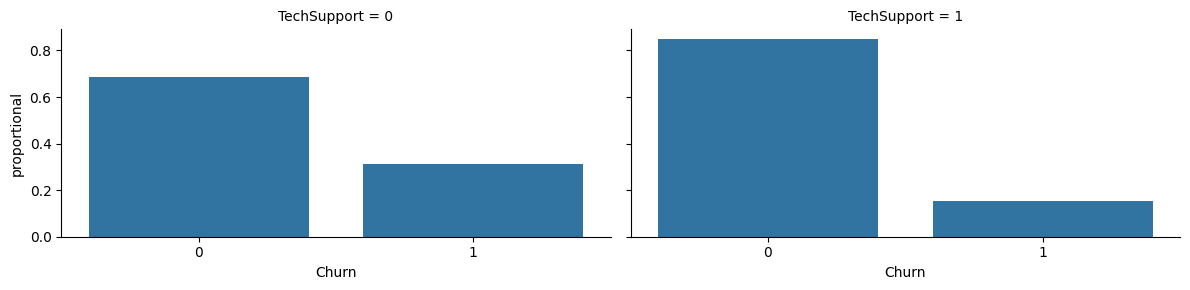

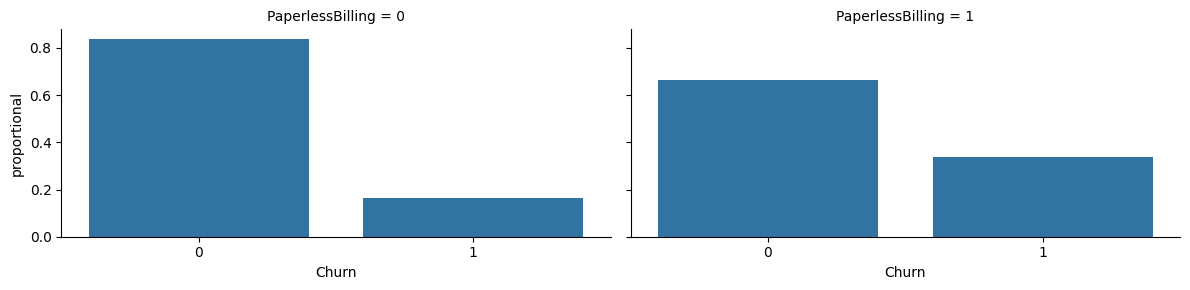

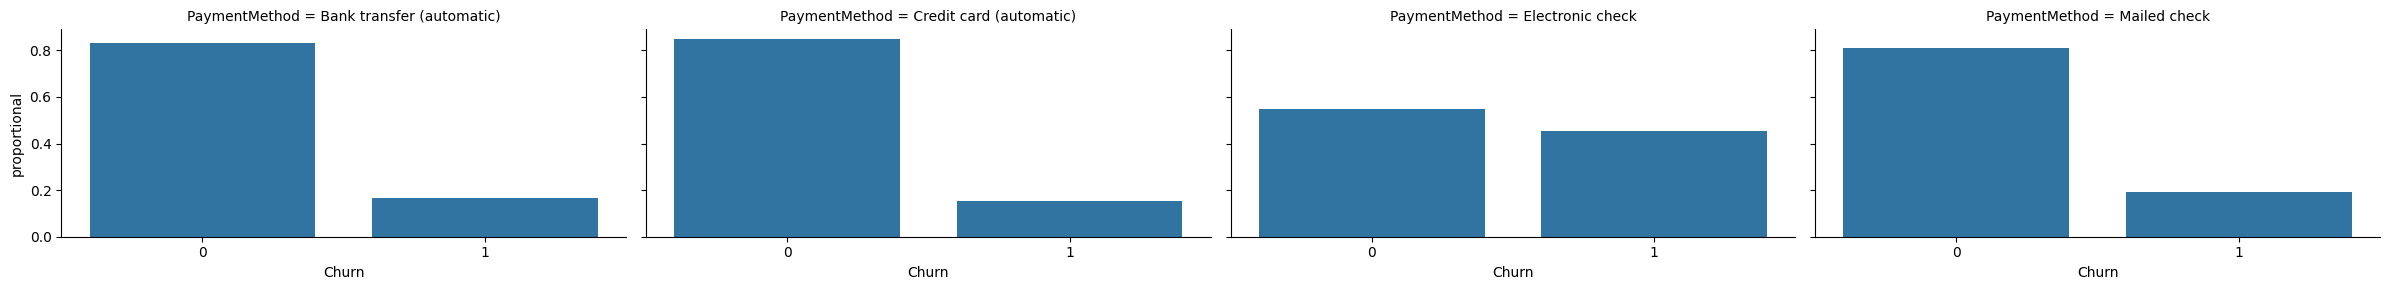

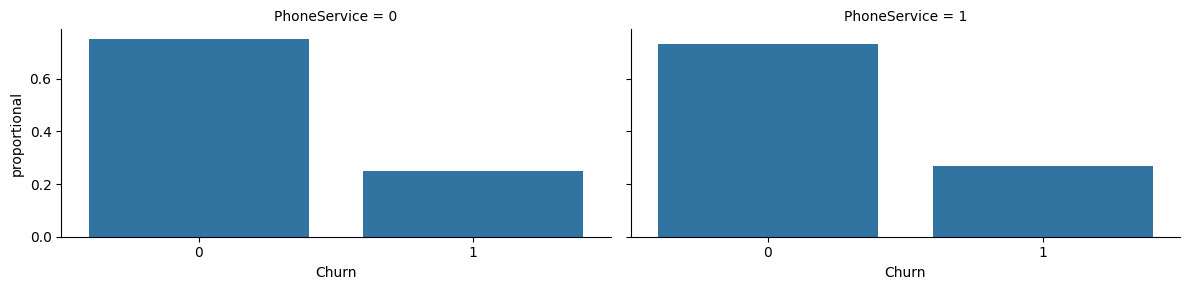

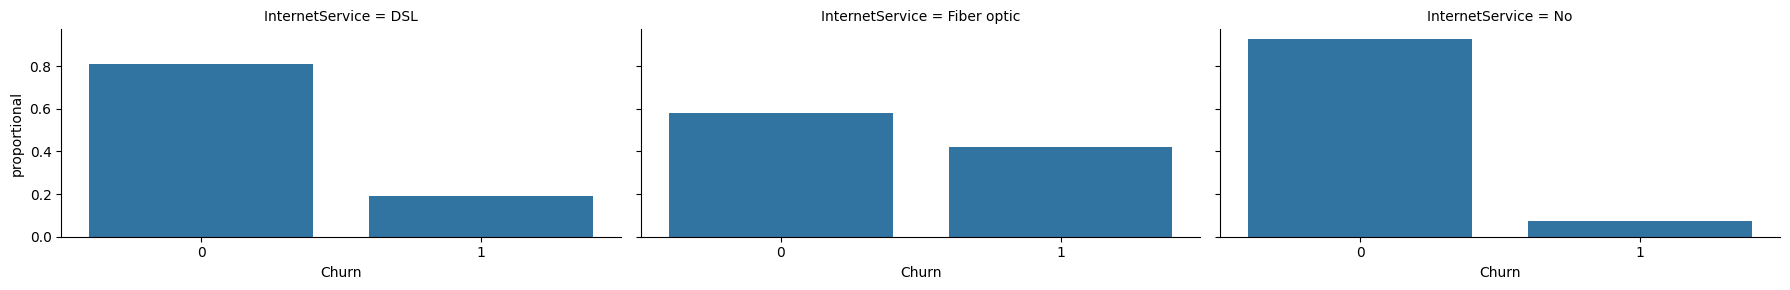

In [19]:
for col in columns_categorical:
    data = proportional_aggregation(raw_data, col, "Churn")
    g = sns.FacetGrid(data, col=col, aspect=2)
    g.map(sns.barplot, "Churn", "proportional")

Based on the plot, it can be concluded that users who get online backup, device protection, 2 year contract, tech support, automatic credit card payment, without streaming TV, without streaming movies, without paperless billing, without internet service are less likely to churn.

### Numerical Data

In [20]:
columns_numerical = ['MonthlyCharges', 'tenure']

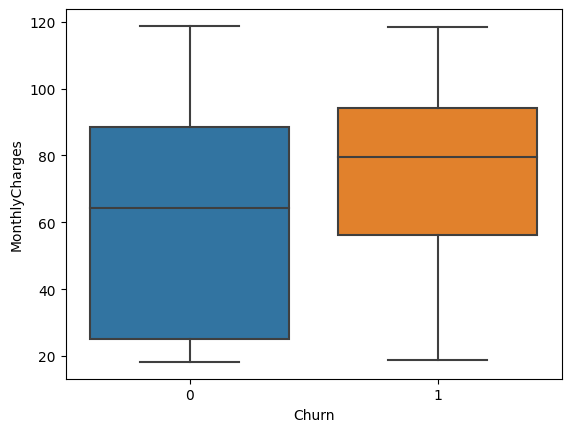

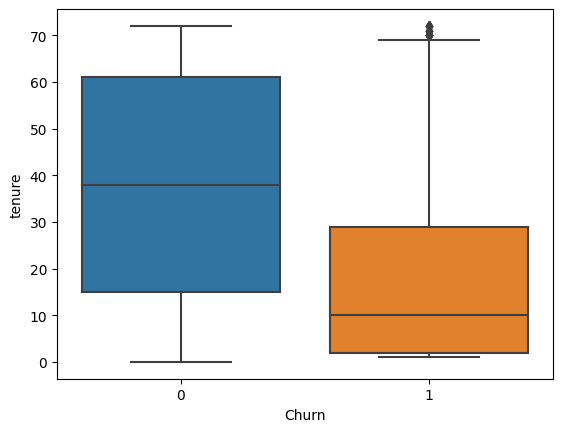

In [21]:
for col in columns_numerical:
  plt.figure()
  sns.boxplot(x = "Churn", y = col, data = raw_data);

Based on the plot above, users with tenure have more opportunities to churn.

In [ ]:
#tambahkan cell jika diperlukan

## 3. Assignment Feature Engineering
* Notes : Lakukan proses Feature Engineering berikut :
1. Lakukan Missing Value % Checking dan imputasi missing value di kolom TotalCharges, gunakan metode yang tepat untuk tipe data yang sesuai.
2. Outlier Handling -> NOT doing in this part, because of in EDA above (numerical data vs churn) have make sense value in tenure and total charges, we capture that dot values indicate in churn label.
3. Encoding : OHE (gender), mean encoding (Internet Service, Contract, PaymentMethod)
4. Feature Scalling : have big range value in tenure, MonthlyCharges, TotalCharges.
5. Notes untuk feature scalling : Gunakan metode Standar Scaller, lakukan pengecekan distribusi sebelum dan setelah feature scalling menggunakan kdeplot.

* NB : Lakukan kaidah feature engineering (splitting dan teknik lainnya) seperti pada day 4.

In [22]:
#Train test Split (train : tes = 80:20)
from sklearn.model_selection import train_test_split
train, test = train_test_split(raw_data, test_size = 0.2, random_state=42, stratify = raw_data.Churn)

### Handling missing values

In [23]:
def display_null_values(train, test):
  """
  Fungsi untuk menampikan null values
  """
  print("Missing values in train data:\n")
  print(train.isna().sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isna().sum())

display_null_values(train, test)

Missing values in train data:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64


Missing values in test data:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64


In [24]:
def display_isna_values(train, test):
  """
  Fungsi untuk menampilkan missing values
  """
  print("Missing values in train data:\n")
  print(train.isna().sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isna().sum())

display_isna_values(train, test)

Missing values in train data:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64


Missing values in test data:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64


In [25]:
raw_data[raw_data['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,Male,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0
936,Female,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,NaN,0
1082,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0
1340,Female,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,0
3331,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,NaN,0
3826,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0
4380,Female,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0
5218,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,NaN,0
6670,Female,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,NaN,0


In [26]:
100 * len(raw_data[raw_data['TotalCharges'].isna()]) / len(raw_data)

0.15618344455487718

In [27]:
# Median imputation on TotalCharges column : train
median_totalcharges = train[~train['TotalCharges'].isna()]['TotalCharges'].median()
median_totalcharges

1398.125

In [28]:
#implement missing value imputation to train and test, from TotalCharges median value in train data
train['TotalCharges'].fillna(median_totalcharges, inplace=True)
test['TotalCharges'].fillna(median_totalcharges, inplace=True)

In [29]:
display_null_values(train, test)

Missing values in train data:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Missing values in test data:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Encoding

In [30]:
#OHE
encode_ohe = ['gender'] #buat list nama-nama kolom yang ingin dilakukan OHE
train = pd.get_dummies(train, columns=encode_ohe)
test = pd.get_dummies(test, columns=encode_ohe)

In [31]:
mean_encoding = ['InternetService', 'Contract', 'PaymentMethod']

In [32]:
for column in mean_encoding:
    mean_encoded = train.groupby([column])['Churn'].mean().to_dict()
    train[column] =  train[column].map(mean_encoded)
    test[column] =  test[column].map(mean_encoded)


In [33]:
train['Contract']

3738    0.427466
3151    0.427466
4860    0.028698
3867    0.028698
3810    0.427466
2666    0.028698
2645    0.427466
189     0.427466
5767    0.028698
2257    0.110827
2641    0.427466
6950    0.427466
3938    0.427466
2764    0.427466
3113    0.427466
2986    0.028698
5427    0.427466
328     0.427466
11      0.028698
4559    0.427466
6271    0.110827
6234    0.028698
3741    0.028698
6937    0.427466
622     0.110827
6969    0.427466
1056    0.427466
6491    0.427466
2582    0.427466
478     0.427466
2935    0.028698
1236    0.427466
6321    0.427466
2414    0.110827
4805    0.028698
785     0.110827
577     0.427466
5704    0.427466
1201    0.427466
5488    0.110827
3253    0.427466
7004    0.427466
4392    0.427466
4453    0.427466
6780    0.427466
2564    0.110827
5338    0.028698
3128    0.427466
3887    0.427466
4097    0.427466
2652    0.427466
6773    0.427466
1118    0.427466
645     0.427466
3420    0.427466
1797    0.028698
6148    0.028698
2320    0.028698
6155    0.4274

### Feature Scaling

In [34]:
columns_scaller = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Menerapkan standarisasi ke data pelatihan (train)
train[['tenure_stds', 'MonthlyCharges_stds', 'TotalCharges_stds']] = scaler.fit_transform(train[columns_scaller])

# Menerapkan standarisasi yang sama ke data uji (test)
test[['tenure_stds', 'MonthlyCharges_stds', 'TotalCharges_stds']] = scaler.transform(test[columns_scaller])

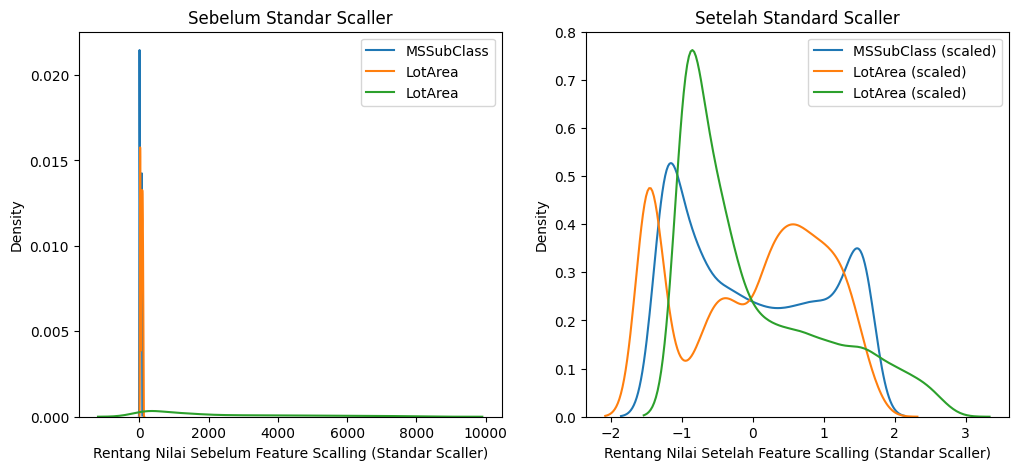

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaller')
sns.kdeplot(train['tenure'], ax=ax1, label='MSSubClass')
sns.kdeplot(train['MonthlyCharges'], ax=ax1, label='LotArea')
sns.kdeplot(train['TotalCharges'], ax=ax1, label='LotArea')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaller')
sns.kdeplot(train['tenure_stds'], ax=ax2, label='MSSubClass (scaled)')
sns.kdeplot(train['MonthlyCharges_stds'], ax=ax2, label='LotArea (scaled)')
sns.kdeplot(train['TotalCharges_stds'], ax=ax2, label='LotArea (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scalling (Standar Scaller)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scalling (Standar Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

In [ ]:
#tambahkan cell jika diperlukan

## 4. Assignment Modelling
1. Gunakan Machine Learning Model dibawah ini :
- Logistic Regression
- KNN
- Decision tree
- SVM RBF
- Dengan ratio : class_weight = {0: 0.265531, 1:0.734469} #class_weight = pembobotan, (kecuali pada KNN)
2. Lakukan fitting dan Model evaluasi di tiap model, keluarkan nilai pada confusion matrix (akurasi, recall, presisi, f1-score). Fokuslah pada nilai recall untuk menentukan model terbaik (melihat pada selisih nilai evaluasi di train dengan test). (Sebagai tambahan bisa pakai presisi + f1-score)
3. Selain nilai confusion matrix yang dibandingkan antara train dan test untuk melihat overfitting atau underfitting, lakukan juga pengecekan learning curve untuk melihat modelnya optimal (model terbaik), atau underfitting, atau overfitting. Gunakanlah scoring ROC-AUC untuk matrix pada learning curve, cv = 5, lakukan concat pada X_train dengan X_test menjadi x, y_train dengan y_test menjadi y.

In [37]:
#split dataset to X_train, y_train, X_test, y_test
X_train = train.drop(columns=['Churn'])
y_train = train['Churn']
X_test = test.drop(columns=['Churn'])
y_test = test['Churn']

In [38]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender_Female,gender_Male,tenure_stds,MonthlyCharges_stds,TotalCharges_stds
3738,0,0,0,35,0,0,0.186887,0,0,1,0,1,1,0.427466,0,0.457430,49.20,1701.65,0,1,0.102371,-0.521976,-0.263290
3151,0,1,1,15,1,0,0.420862,1,0,0,0,0,0,0.427466,0,0.192846,75.10,1151.55,0,1,-0.711743,0.337478,-0.504815
4860,0,1,1,13,0,0,0.186887,1,1,0,1,0,0,0.028698,0,0.192846,40.55,590.35,0,1,-0.793155,-0.809013,-0.751214
3867,0,1,0,26,1,0,0.186887,0,1,1,0,1,1,0.028698,1,0.149217,73.50,1905.70,1,0,-0.263980,0.284384,-0.173700
3810,0,1,1,1,1,0,0.186887,0,0,0,0,0,0,0.427466,0,0.457430,44.55,44.55,0,1,-1.281624,-0.676279,-0.990851


In [39]:
y_train.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: Churn, dtype: float64

### Logistic Regression

In [40]:
logistic_model = LogisticRegression(
    random_state = 42,
    class_weight = {0: 0.265531, 1:0.734469} #class_weight = pembobotan
)

In [41]:
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.265531, 1: 0.734469}, random_state=42)

### KNN

In [42]:
knn_clf = KNeighborsClassifier()

In [43]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

### Decision Tree

In [44]:
dt_clf = DecisionTreeClassifier(
    random_state = 42,
    class_weight = {0: 0.265531, 1:0.734469}
)

In [45]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.265531, 1: 0.734469}, random_state=42)

### SVM

In [46]:
svm_clf = SVC(
    random_state = 42,
    probability=True,
    class_weight = {0: 0.265531, 1:0.734469}
)

In [47]:
svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 0.265531, 1: 0.734469}, probability=True, random_state=42)

### Evaluation

In [48]:
from sklearn.metrics import roc_auc_score

def evaluate(model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))
    print('ROC-AUC Score Data Train:', roc_auc_score(y_train, y_pred_train))

    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))
    print('ROC-AUC Score Data Test:', roc_auc_score(y_test, y_pred))


In [49]:
#logistic regression
logreg_pred = logistic_model.predict(X_test)

# knn prediction
knn_pred = knn_clf.predict(X_test.values)

# decision tree prediction
dc_pred = dt_clf.predict(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Logistic Regression

In [50]:
evaluate(logistic_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      4139
           1       0.53      0.77      0.63      1495

    accuracy                           0.76      5634
   macro avg       0.72      0.76      0.73      5634
weighted avg       0.80      0.76      0.77      5634

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1146
True Negative: 3131
False Positive: 1008
False Negative: 349

Accuracy Data Train: 0.7591409300674477
Precision Data Train: 0.532033426183844
Recall Data Train: 0.7665551839464882
F1-Score Data Train: 0.6281172924088791
ROC-AUC Score Data Train: 0.761509048846885
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409


KNN

In [51]:
evaluate(knn_clf, x_test = X_test.values, y_test = y_test, x_train=X_train.values, y_train=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4139
           1       0.73      0.56      0.63      1495

    accuracy                           0.83      5634
   macro avg       0.79      0.74      0.76      5634
weighted avg       0.82      0.83      0.82      5634

------
Assuming 1 as positive, we get for Data Train:

True Positive: 841
True Negative: 3826
False Positive: 313
False Negative: 654

Accuracy Data Train: 0.8283635072772453
Precision Data Train: 0.7287694974003466
Recall Data Train: 0.5625418060200669
F1-Score Data Train: 0.6349565873914684
ROC-AUC Score Data Train: 0.7434598375352811


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1035
           1       0.57      0.43      0.49       374

    accuracy                           0.76      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409

------
Assuming 1 as positive, we get:

True Positive: 161
True Negative: 913
False Positive: 122
False Negative: 213

Accuracy: 0.7622427253371186
Precision Data Test: 0.568904593639576
Recall Data Test: 0.4304812834224599
F1-Score Data Test: 0.49010654490106553
ROC-AUC Score Data Test: 0.656303443643597


Decision Tree

In [52]:
evaluate(dt_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       0.99      1.00      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1494
True Negative: 4128
False Positive: 11
False Negative: 1

Accuracy Data Train: 0.9978700745473909
Precision Data Train: 0.9926910299003322
Recall Data Train: 0.9993311036789297
F1-Score Data Train: 0.996
ROC-AUC Score Data Train: 0.9983367284521731
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1035
           1       0.50      0.48      0.49       374

    accuracy                           0.74      1409
   macro avg   

SVM

In [53]:
evaluate(svm_clf, x_test = X_test.values, y_test = y_test, x_train=X_train.values, y_train=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.81      0.69      0.74      4139
           1       0.39      0.55      0.46      1495

    accuracy                           0.65      5634
   macro avg       0.60      0.62      0.60      5634
weighted avg       0.70      0.65      0.67      5634

------
Assuming 1 as positive, we get for Data Train:

True Positive: 826
True Negative: 2845
False Positive: 1294
False Negative: 669

Accuracy Data Train: 0.6515796947106851
Precision Data Train: 0.389622641509434
Recall Data Train: 0.5525083612040134
F1-Score Data Train: 0.45698478561549105
ROC-AUC Score Data Train: 0.6199362294060655


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1035
           1       0.41      0.58      0.48       374

    accuracy                           0.66      1409
   macro avg       0.61      0.64      0.62      1409
weighted avg       0.71      0.66      0.68      1409

------
Assuming 1 as positive, we get:

True Positive: 218
True Negative: 718
False Positive: 317
False Negative: 156

Accuracy: 0.6643009226401704
Precision Data Test: 0.4074766355140187
Recall Data Test: 0.5828877005347594
F1-Score Data Test: 0.47964796479647964
ROC-AUC Score Data Test: 0.6383037536490223


### Learning Curve

In [54]:
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

In [55]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y, cv, scoring, title):

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel("neg_mean_squared_error")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training RMSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing RMSE")

    plt.legend(loc="best")
    plt.show()

Logistic Regresion

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

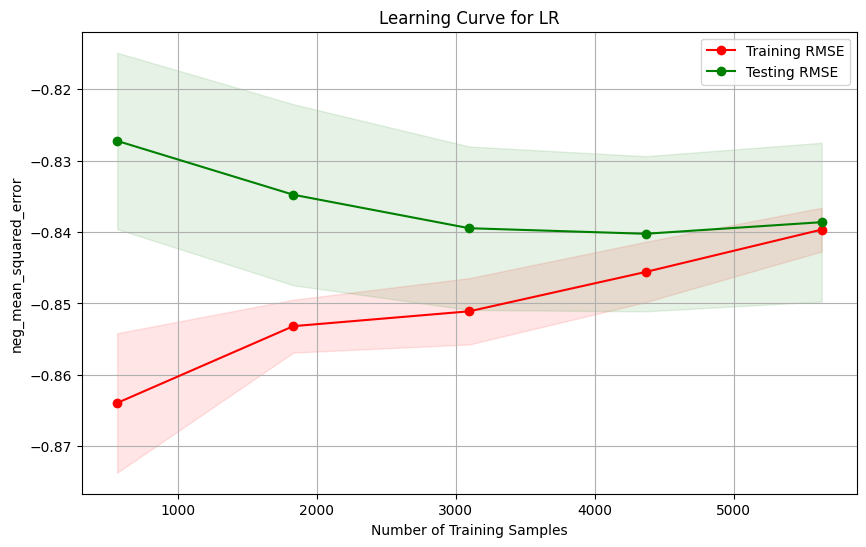

In [68]:
plot_learning_curve(logistic_model, X, y, cv=5, scoring='roc_auc', title="Learning Curve for LR")

KNN

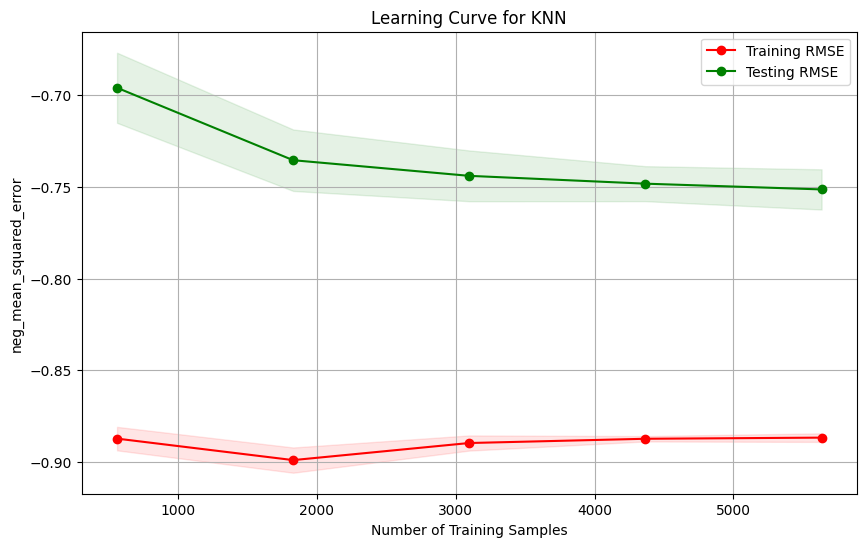

In [57]:
plot_learning_curve(knn_clf, X, y, cv=5, scoring='roc_auc', title="Learning Curve for KNN")

DTREE

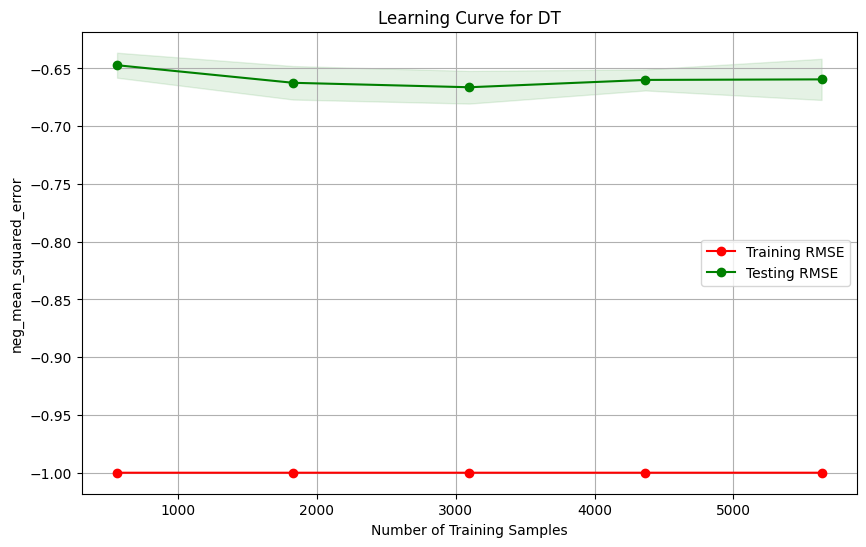

In [58]:
plot_learning_curve(dt_clf, X, y, cv=5, scoring='roc_auc', title="Learning Curve for DT")

SVM

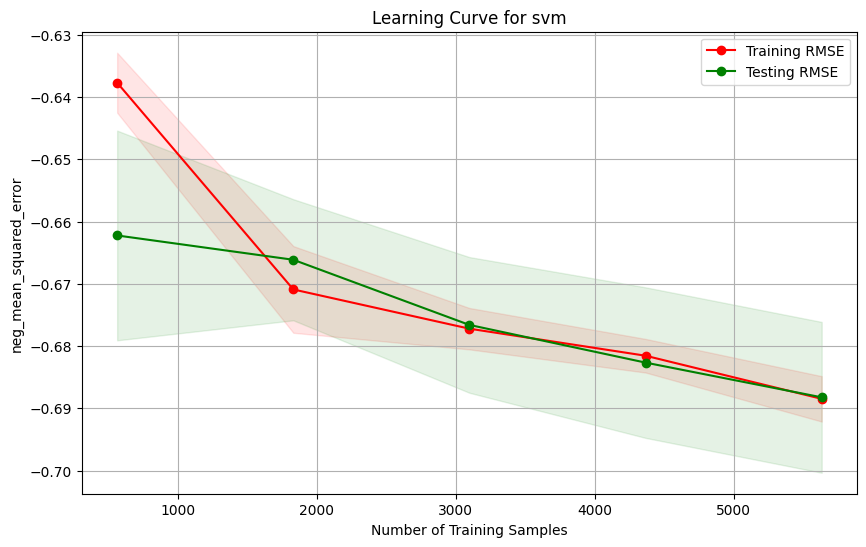

In [59]:
plot_learning_curve(svm_clf, X, y, cv=5, scoring='roc_auc', title="Learning Curve for svm")

## 5. Assignment Profitable : Cumulative Gain Plot
1. Gunakan model terbaik dari hasil evaluasi di soal nomor 4 diatas.
2. Gunakan plot_cumulative_gain dari scikitplot library
3. Pilih Kelas 1 (yes churn) dari hasil prediksi X_test, lakukan sampling (nilainya bebas) yang diambil dari plot_cumulative_gain
4. Hitunglah menggunakan rumus dibawah ini di excel kemudian copy ke PPT:

*formula

- saved : population* % sampling * performa model or without model
- failed : treat - saved
- Total Cost : Biaya promosi * treat
- profit : (Total cost*margin rate) * saved
- netto : profit - total cost

* Notes :
1. margin rate (20%)
2. Biaya promosi per orang (Rp) : 300000

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

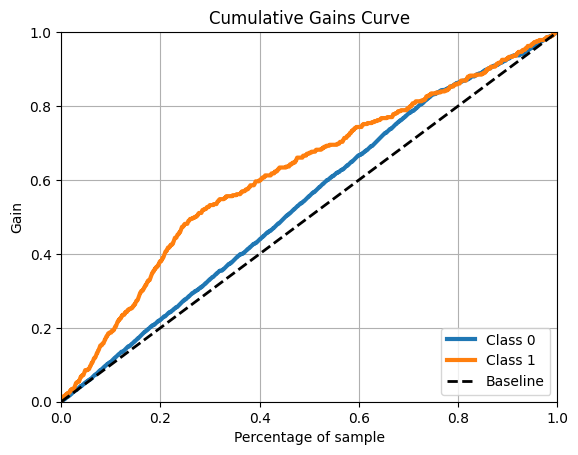

In [69]:
!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, dt_clf.predict_proba(X_test))

In [71]:
from sklearn.metrics import confusion_matrix
def value_prediction(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    print('TN :',tn)
    print('TP :',tp)
    print('FN :',fn)
    print('FP :',fp)

In [72]:
value_prediction(y_test, dt_clf.predict(X_test))

TN : 858
TP : 180
FN : 194
FP : 177


In [63]:
y_test.value_counts()

0    1035
1     374
Name: Churn, dtype: int64

In [73]:
y_pred = pd.DataFrame(dt_clf.predict(X_test))
y_pred.value_counts()

0    1052
1     357
dtype: int64

In [74]:
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
#Value Prediction
dt_clf.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#tambahkan cell jika diperlukan

## Notes :
Kumpulkan di LMS link google collab yang sudah dibuka aksesnya + sudah di run dan save output codenya + cantumkan link postingan linkedin di markdown google collab

### Link Postingan Linkedin (cantumkan disini) :